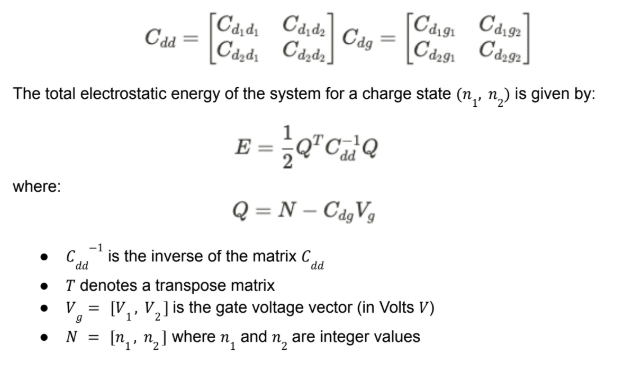

#**Given the following data:**

Cdd = np.array([[10, -3], [-3, 12]])

Cdg = np.array([[1, -0.1], [0.15, 1.2]])

with V1 and V2 each ranging from -1 to 3.5, stepped in 0.01 increments, and considering charge states consisting of all combinations (n1, n2) such that .


#**Task**

1) Compute the total electrostatic energies E for each considered charge state and each unique combination of V1 and V2.

2) Determine, for each unique combination of V1 and V2, which charge state has the lowest energy.

3) Plot a heat map, with V1 along the x-axis and V2 along the y-axis, displaying the lowest energy charge states for each point (V1, V2), and save this as “plot.png”.

In [12]:
#pip install numpy #if numpy is not available

In [13]:
#pip install matplotlib #if matplotlib not available

Initializing the capacitance matrices, gate voltages and Charge states N by using numpy

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

# Given capacitance matrices
Cdd = np.array([[10, -3], [-3, 12]])
Cdg = np.array([[1, -0.1], [0.15, 1.2]])

scaleGrid = 451
#initializing the scaleGridx1 points for each gate voltage V1 and V2
V1 = np.linspace(-1, 3.5, num=scaleGrid)
V2 = V1.copy()

# Generating the charge states (n1, n2) in 4x4 = 16 combinations
N = np.array([[n1, n2] for n1 in range(4) for n2 in range(4)])


#Goal #1: Calculating the charge Q;

Q = N-Cdg_dot_Vg


In [15]:

#Initializing the second term in the Q with zeros
Cdg_dot_Vg = np.zeros((scaleGrid,scaleGrid,2))

#Calculating Cdg_dot_Vg
for v1i in range(scaleGrid):
  for v2i in range(scaleGrid):
    Cdg_dot_Vg[v1i,v2i] = np.dot(Cdg,[V1[v1i], V2[v2i]]) #second term in Q

#initializing the charge Q with 16xscaleGridxscaleGridx2 zeros
Q = np.zeros((16, scaleGrid,scaleGrid,2)) #Q[0] is indicating the charge state (0,0)-Cdg_dot_Vg ..... Q[16] is (3,3)-Cdg_dot_Vg
#Calculating the charge Q
for Qi in range(16):
  for v1i in range(scaleGrid):
      Q[Qi, v1i] = N[Qi] - Cdg_dot_Vg[v1i] #16xscaleGridxscaleGridx2

#Goal #2: Calculating the total electrostatic enerngy E;
E = 0.5x(Q^{T} . inverse_Cdd . Q)


In [16]:
# Pre computing the inverse of capacitance matrix Cdd
inverse_Cdd = inv(Cdd)
#initializing the energy E with 16xscaleGridxscaleGrid zeros
E = np.zeros((16,scaleGrid,scaleGrid))
#Calculating the energy E
for Qi in range(16):
  for v1i in range(scaleGrid):
    for v2i in range(scaleGrid):
      E[Qi, v1i, v2i] = 0.5*np.dot(Q[Qi, v1i, v2i], np.dot(inverse_Cdd, Q[Qi, v1i, v2i])) # 16xscaleGridxscaleGrid Energy

#Goal #3: finding lowest energy charge states for each unique V1,V2 --> there are 16xscaleGridxscaleGrid energy values in which scaleGridxscaleGrid values comes out to be the lowest energy values, here dictionary "lowEN" contains the lowest energy state for each unique V1 and V2.



In [17]:
#Initializing the lowest energy charge states array to store the lowest energy charge states
lowEN = np.zeros((scaleGrid,scaleGrid))
#Calculating lowest energy charge states by going throgh all 16 charge states for each unique V1,V2
for v1i in range(scaleGrid):
    for v2i in range(scaleGrid):
        buffer = E[0, v1i, v2i]
        lowEN[v1i,v2i] = 0
        for Ni in range(1, 16):
            if(buffer > E[Ni, v1i, v2i]):
                buffer = E[Ni, v1i, v2i]
                lowEN[v1i,v2i] = Ni
#Ni in the lowEN can be used to get (n1,n2) from the charge state array N

#Goal #4: Plotting the obtained lowest energy states on meshgrid

In [18]:
#Generating the string lables for the charge states to attach to the toolstrip of the Charge state
chargeStates = ['('+str(n1)+', '+str(n2)+')' for n1 in range(4) for n2 in range(4)]

#drawing an empty figure
plt.figure()
#plotting the mesh as per the default color coding
mesh = plt.pcolor(V1, V2, lowEN.T)

# Generating evenly spaced ticks for Charge state
ticks = np.linspace(0, 15, 16)

# Using the corresponding labels on toolstrip of Charge state
colorBar = plt.colorbar(mesh, label = 'Charge State', ticks=ticks)
colorBar.ax.set_yticklabels(chargeStates) #labeling charge state ticks

plt.xlabel('V1 (V)')
plt.ylabel('V2 (V)')
plt.title('Charge Stability Diagram')
plt.savefig('plot.png')
plt.close() #closing the figure after saving otherwise it will display in the notebook

# **References:**
1) numpy: https://numpy.org/doc/2.1/index.html

2) matplotlib: https://matplotlib.org/stable/index.html